# CARTHE errors overview
- GPS quality
- ids
- count
- maps
- grid
- experience time

In [1]:
import os
import math
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import xarray as xr

import cartopy.crs as ccrs
import cartopy.feature as cfeature

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.cm as cmx

import pynsitu as pin
from pynsitu.maps import crs
image_dir = '/Users/mdemol/ownCloud/PhD/images/carthe_noise'

colors = pin.get_cmap_colors(21, cmap="rainbow")
from cycler import cycler
plt.rc("axes", prop_cycle=cycler(color=colors))

In [2]:
def read_carthe_drifters(file):
    
    df = pd.read_csv(file, parse_dates=[1])
    
    df = (df
          .rename(columns=dict(DeviceName="id", DeviceDateTime="time", 
                               Latitude="lat", Longitude="lon"))
          .sort_values("id")
         )
    df = df.set_index("id")
        
    return df

---

## Load drifters trajectories

`drifters_bin.csv` is a binary csv file and it was converted into an ascii csv file with:

```
cat drifters_bin.csv | tr -d '\0' > drifters.csv
```



In [3]:
drifter_file = os.path.join('/Users/mdemol/code/PhD/carthe_noise', "carthe_noise_ok.csv")
df = read_carthe_drifters(drifter_file).reset_index().set_index('time').sort_values('time')
df.head()

,id,BatteryStatus,CommId,GPS Confidence,GPS Fail Counter,GpsQuality,lat,lon
time,,,,,,,,
2023-03-07 10:10:14,0-4351906,GOOD,0-4351906,0,0,3,48.357964,-4.560463
2023-03-07 10:11:03,0-4388557,GOOD,0-4388557,0,0,3,48.357943,-4.560592
2023-03-07 10:11:18,0-4351902,GOOD,0-4351902,0,0,3,48.357922,-4.560485
2023-03-07 10:11:41,0-4367307,GOOD,0-4367307,0,0,3,48.357911,-4.560463
2023-03-07 10:11:42,0-4367707,GOOD,0-4367707,0,0,3,48.357922,-4.560378


____
## Remove Gps Quality =1 0.0 values

In [4]:
df = df[df.GpsQuality != 1]

____
# Overview
- GPS quality
-  ids
- count
- maps
- grid
- experience time


In [5]:
df.groupby('GpsQuality').count()

,id,BatteryStatus,CommId,GPS Confidence,GPS Fail Counter,lat,lon
GpsQuality,,,,,,,
2,1,1,1,1,1,1,1
3,7352,7352,7352,7352,7352,7352,7352


### ID list

In [17]:
ids = ['0-4351902','0-4351296',#
       '0-4388581', '0-4388675', '0-4388627', '0-4388605', '0-4388608', '0-4388635', '0-4388620', '0-4388599',
       '0-4351906', '0-4388557', '0-4367307', '0-4367707', '0-4356534', '0-4367310', '0-4367706', '0-4367683', '0-4351945', '0-4356456', '0-4388554',]

In [18]:
len(ids)

21

### Maps and dispersion

In [19]:
def geo_plot(df, list_id, title="", legend="", lon_ex = 1e-3, lat_ex=1e-3, s=3, extent=None,  **kwargs):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.EckertIII(central_longitude=0))
    ax.add_feature(cfeature.LAND)
    
    lat_min, lat_max = df[df.lon!=0].lon.min(), df[df.lon!=0].lon.max()
    lon_min, lon_max = df[df.lat!=0].lat.min(), df[df.lat!=0].lat.max()
    for id_ in list_id:
        df_ = (
            df[df.id==id_][["lon", "lat"]]
        )
        lon = np.array(df_.lon)
        lat = np.array(df_.lat)
        ax.scatter(
            lon, lat, marker=".", s=s, transform=ccrs.PlateCarree(), label=str(id_)
        )
    lat_med = df.lat.median()
    lon_med = df.lon.median() 
    if extent == None:
        ax.set_extent(np.array([lon_med-lon_ex, lon_med+lon_ex, lat_med-lat_ex, lat_med+lat_ex]), ccrs.PlateCarree())
    else : 
        ax.set_extent(extent, ccrs.PlateCarree())
        
    ax.set_title(title, fontsize=15)
    gl = ax.gridlines(
        draw_labels=True,
    )
    print([lon_min, lon_max, lat_min, lat_max])
    fig.legend()
    return fig

[45.398147, 48.360657, -4.562781, -0.086088]


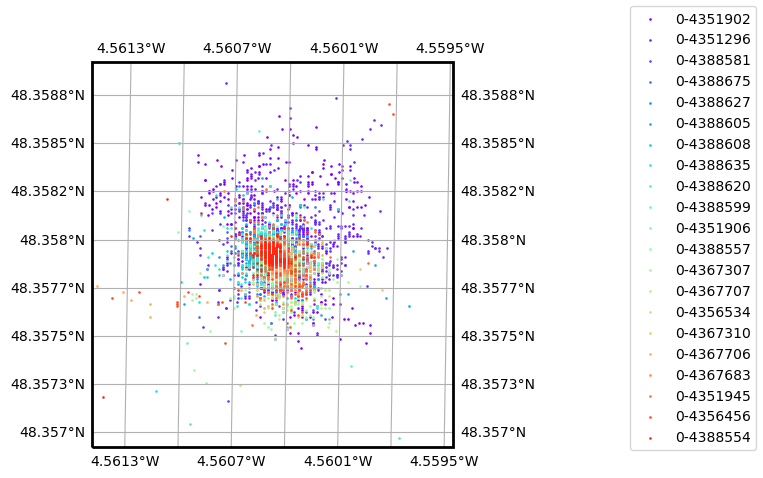

In [20]:
fig1 = geo_plot(df, ids)

[45.398147, 48.360657, -4.562781, -0.086088]


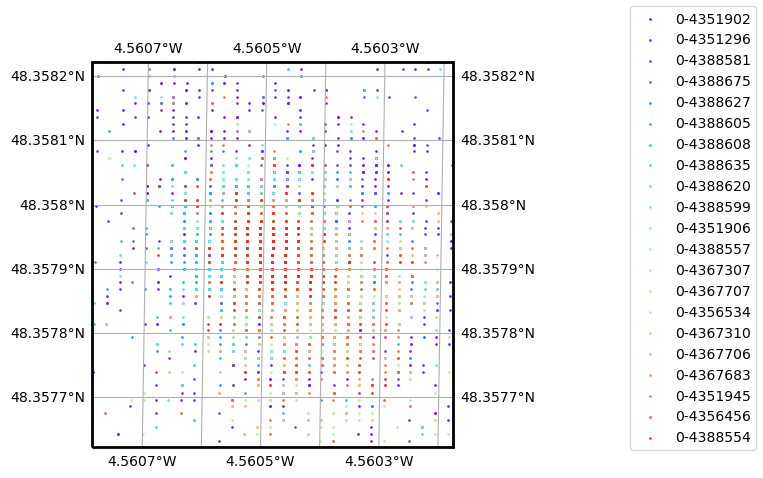

In [33]:
fig2 = geo_plot(df, ids, lon_ex=3e-4, lat_ex=3e-4)

[45.398147, 48.360657, -4.562781, -0.086088]


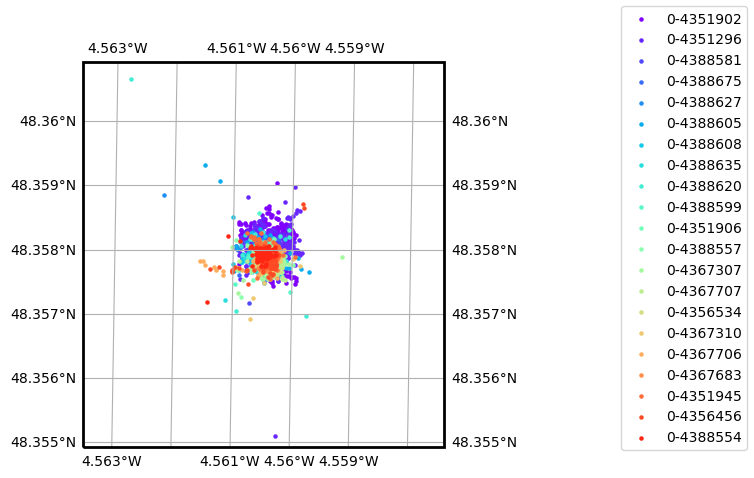

In [44]:
fig1 = geo_plot(df, ids, s=20,lon_ex=3e-3, lat_ex=3e-3)

[-5.062781, 0.413912, 44.898147, 48.860657]
[45.398147, 48.360657, -4.562781, -0.086088]


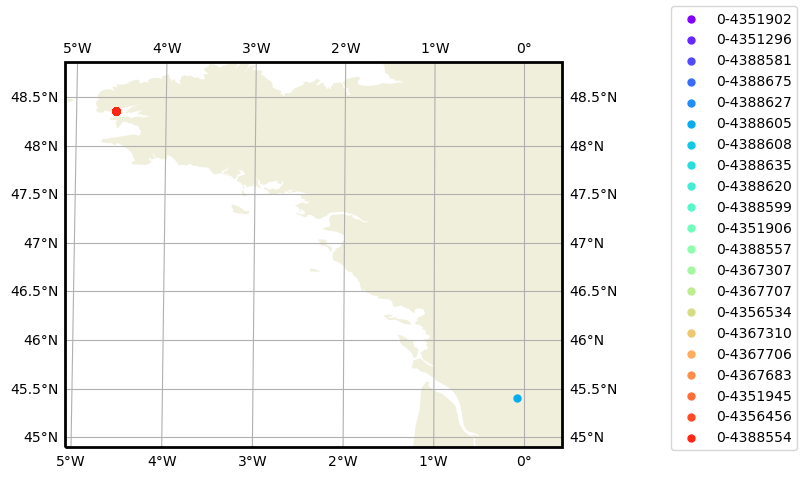

In [45]:
dl = 5e-1
extent=[df.lon.min()-dl, df.lon.max()+dl,df.lat.min()-dl, df.lat.max()+dl]
print(extent)
fig0 = geo_plot(df, ids,s=100, extent=[df.lon.min()-dl, df.lon.max()+dl, df.lat.min()-dl, df.lat.max()+dl])

In [46]:
fig0.savefig(os.path.join(image_dir, 'carthemap0.png'), dpi=250)
fig1.savefig(os.path.join(image_dir, 'carthemap1.png'), dpi=250)
fig2.savefig(os.path.join(image_dir, 'carthemap2.png'), dpi=250)

In [38]:
len(df.lon.unique()), len(df.lat.unique())

(76, 131)

### GRID

In [39]:
#
R=6371e3
glon = df.lon.sort_values().diff()
#glon = np.diff(df.lon.sort_values().unique())
glon = glon[glon!=0].min()
glat = df.lat.sort_values().diff()
glat = glat[glat!=0].min()
mean = np.array((df.lat.mean(),df.lon.mean))
print(f'lon step : {round(glon, 6)}° {round(glon*np.pi/180*R*np.sin(np.pi/180*df.lat.median()), 2)}m')
print(f'lat step : {round(glat,6)}° {round(glat*np.pi/180*R,2)}m')

lon step : 2.1e-05° 1.75m
lat step : 1e-05° 1.11m


### Exp time

In [43]:
def give_exp_time(df):
    return df.time.max()-df.time.min()
df.reset_index().groupby('id').apply(give_exp_time)

id
0-4351296   2 days 22:31:32
0-4351902   2 days 22:29:37
0-4351906   0 days 21:44:28
0-4351945   0 days 21:39:29
0-4356456   0 days 21:39:07
0-4356534   0 days 21:39:08
0-4367307   0 days 21:44:56
0-4367310   0 days 21:44:05
0-4367683   0 days 21:39:14
0-4367706   0 days 21:44:27
0-4367707   0 days 21:41:22
0-4388554   0 days 21:40:04
0-4388557   0 days 21:41:08
0-4388581   1 days 07:11:48
0-4388599   1 days 07:07:16
0-4388605   1 days 07:11:47
0-4388608   1 days 07:11:27
0-4388620   1 days 07:04:22
0-4388627   1 days 07:12:10
0-4388635   1 days 07:10:20
0-4388675   1 days 07:06:51
dtype: timedelta64[ns]